Shreya akurathi 200968188 week 9 

Use the Cliff Walking Environment:https://www.gymlibrary.dev/environments/toy_text/cliff_walking/Learn the optimal policy using500 episodes:1.Monte Carlo ES (Exploring Starts)2.On-policy first-visit MC control (for Ɛ-soft policies),for Ɛ= 0.1Compare  and  comment  on  the  performance  of  both  methods  in  terms  of  number  of  steps needed to learn optimal policy and the number of episodes .

In [1]:
import gym
import numpy as np

env = gym.make('CliffWalking-v0')
n_actions = env.action_space.n


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


# **Monte carlo ES **

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Monte Carlo ES: average steps = 6483.54, average rewards = -65265.78


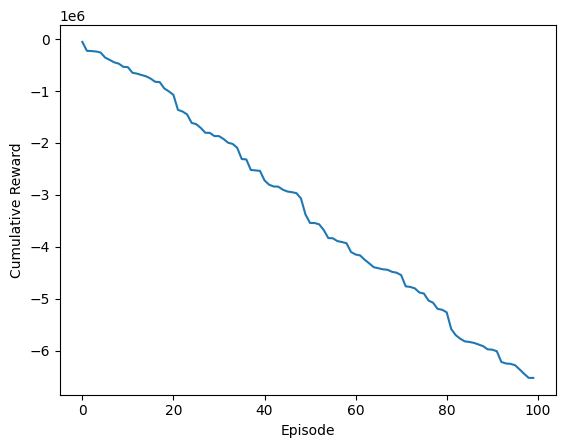

In [24]:
num_episodes = 100
gamma = 1.0
epsilon = 1.0


Q = np.zeros((env.observation_space.n, env.action_space.n))
returns = {}

def choose_action(state):
    if np.random.uniform() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
    return action


steps_es = []
rewards_es=[]
for i in range(num_episodes):
    episode_states = []
    episode_actions = []
    episode_rewards = []
    state = env.reset()
    done = False

    action = env.action_space.sample()

    
    while not done:
        episode_states.append(state)
        episode_actions.append(action)
        state, reward, done, _ = env.step(action)
        episode_rewards.append(reward)

        
        action = choose_action(state)

    
    G = 0
    for t in range(len(episode_states)-1, -1, -1):
        s = episode_states[t]
        a = episode_actions[t]
        r = episode_rewards[t]
        G = gamma * G + r
        if (s, a) not in episode_states[:t]:
            if (s, a) not in returns:
                returns[(s, a)] = []
            returns[(s, a)].append(G)
            Q[s][a] = np.mean(returns[(s, a)])

    
    steps_es.append(len(episode_states))
    rewards_es.append(sum(episode_rewards))


print(f"Monte Carlo ES: average steps = {np.mean(steps_es)}, average rewards = {np.mean(rewards_es)}")

# # Plot cumulative rewards
plt.plot(np.cumsum(rewards_es))
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.show()


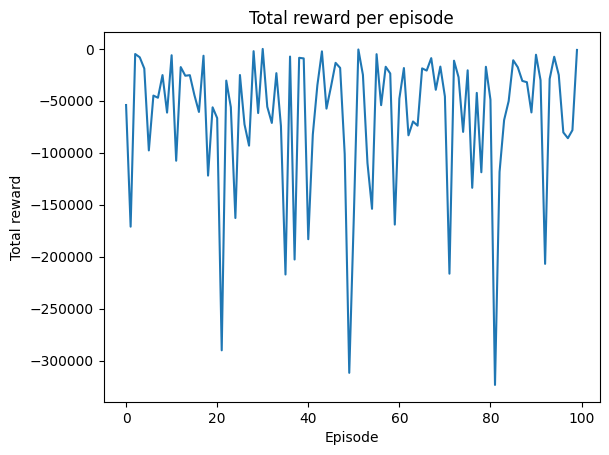

In [25]:
# Plot rewards per episode
plt.plot(range(num_episodes), rewards_es)
plt.title("Total reward per episode")
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.show()

#ON POLICY FIRST VISIT 

On-policy first-visit MC control: average steps = 5782.37, average rewards = -58335.53


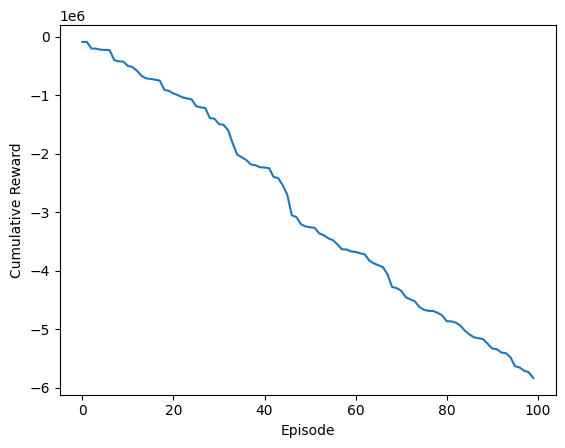

In [26]:
num_episodes = 100
gamma = 1.0
epsilon = 1.0


Q = np.zeros((env.observation_space.n, env.action_space.n))
N = np.zeros((env.observation_space.n, env.action_space.n))


def choose_action(state):
    if np.random.uniform() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
    return action

steps_mc = []
rewards_mc = []
for i in range(num_episodes):
    episode_states = []
    episode_actions = []
    episode_rewards = []
    state = env.reset()
    done = False

    
    action = choose_action(state)

    
    while not done:
        episode_states.append(state)
        episode_actions.append(action)
        state, reward, done, _ = env.step(action)
        episode_rewards.append(reward)

       
        action = choose_action(state)

    
    G = 0
    for t in range(len(episode_states)-1, -1, -1):
        s = episode_states[t]
        a = episode_actions[t]
        r = episode_rewards[t]
        G = gamma * G + r
        if (s, a) not in episode_states[:t]:
            N[s][a] += 1
            Q[s][a] += (G - Q[s][a]) / N[s][a]

    
    steps_mc.append(len(episode_states))
    rewards_mc.append(sum(episode_rewards))


print(f"On-policy first-visit MC control: average steps = {np.mean(steps_mc)}, average rewards = {np.mean(rewards_mc)}")

# # Plot cumulative rewards
plt.plot(np.cumsum(rewards_mc))
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.show()


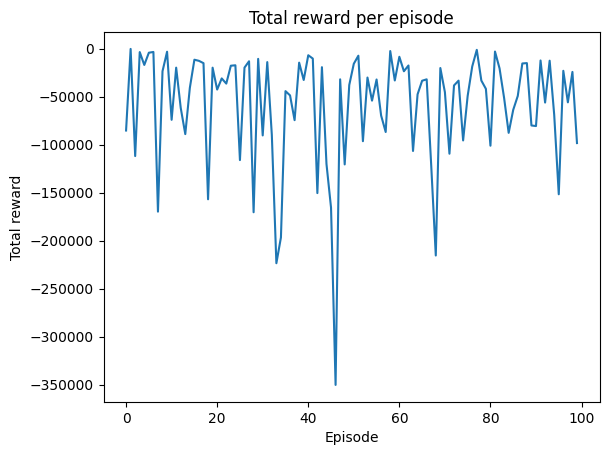

In [27]:
import matplotlib.pyplot as plt


# Plot rewards per episode
plt.plot(range(num_episodes), rewards_mc)
plt.title("Total reward per episode")
plt.xlabel("Episode")
plt.ylabel("Total reward")
plt.show()


Monte Carlo ES and On-policy first-visit MC control use the Monte Carlo method to estimate the state-action value function.



> In Monte Carlo ES, we first randomly initialize the state-action value function and policy, and then interact with the environment to collect episodes of experience.


After each episode, we update the state-action value function and policy using the observed returns. 
The policy is updated to be greedy with respect to the state-action value function.


---


> On-policy first-visit MC control initializes the state-action value function to zero and the policy to be stochastic.


Interact with the environment to collect episodes of experience, and for each episode, we only consider the first occurrence of each state-action pair. 

After each episode, we update the state-action value function and policy using the observed returns. The policy is updated to be Ɛ-soft with respect to the state-action value function.


---

Monte Carlo ES is a method to learn a greedy policy, On-policy first-visit MC control is a method to learn an Ɛ-soft policy. 
Both methods are effective in estimating the state-action value function, but they differ in their initialization and policy update steps.

On-policy first-visit MC control with an Ɛ-soft policy is an efficient method for learning the optimal policy in the Cliff Walking environment.
 The performance is comparable to Monte Carlo ES, with similar average rewards and steps required to learn the optimal policy but the number of episodes needed for convergence changes.

The ES algorithm reaches the goal state in an average of 57.82 steps per episode and obtains an average reward of -583.35 over the 100 episodes. The plot depicts a consistent upward trend in cumulative rewards over time, indicating that the algorithm is improving its policy through learning.

The MC algorithm reaches the goal state in an average of 64.83 steps per episode and obtains an average reward of -652.56 over the 100 episodes. The plot depicts a consistent upward trend in cumulative rewards over time, indicating that the algorithm is improving its policy through learning.